In [1]:
# import the experiment utilities package
import exputils as eu
import numpy as np

# define what data should be loaded and some extra statistics that should be computed                
loader_config = eu.AttrDict(
    load_experiment_data_function = eu.AttrDict(
        pre_allowed_data_filter = [
            'rollout_ep_',
        ],
    )
) 
                
# create an experiment data loader, by default it will load data from '../experiments'
experiment_data_loader = eu.gui.jupyter.ExperimentDataLoaderWidget(config=loader_config)
display(experiment_data_loader)

ExperimentDataLoaderWidget(children=(Box(children=(Button(description='Update Descriptions', layout=Layout(hei…

In [2]:
import numpy as np
import matplotlib
def average_reward_over_time(file):
    # read the data from the .npy file
    data = np.load(file, allow_pickle = True)
    # min-max normalize the data
    data = (data + 200) / (200 - 11)
    # calculate the area under the curve of data against time
    area = np.trapz(data, dx = 1)
    # calculate the normalized area under the curve
    norm_area = area / data.shape[0]
    # map it to [0,1], given the range of the data is [-12, -200]
    return norm_area


In [3]:
def reward_over_entire_training(file):
    data = np.load(file, allow_pickle = True)
    data = data[-1:]
    sum_data = data.sum()
    normalized_sum = sum_data / data.shape[0]
    return normalized_sum
    

In [4]:
from rliable import library as rly
from rliable import metrics
from rliable import plot_utils
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

ModuleNotFoundError: No module named 'rliable'

In [4]:
def count_params(file):
    data = np.load(file, allow_pickle = True)
    return data

In [12]:
scores = {}
algorithm = ['mlp', 'urbf']
data_arr = []
experiment_ids_mlp = [
        #"020102",
        #"020302",
        #"020402",
        #"020502",
        #"020001",
        #"020301",
        #"111211",
        #"020401",
        #"020103",
        #"020303",
        #"020403",
        #"020503",
        "020391",
        "020381",
        "020371",
        "020361",
        "020351",
        "020461",
        "020471",
]
experiment_ids_urbf = [
        #"111012",
        #"111112",
        #"111312",
        #"111412",
        #"111011",
        "111111",
        "111131",
        "111121",
        "111231",
        "111331",
        #"111311",
        #"111013",
        #"111113",
        #"111313",
        #"111413",
        #"111211",
]

experiment_ids_mrbf = [
    "311111",
    "311121",
    "311131",
]

# MLP
results_mlp_mean = []
results_mlp_std = []
results_mlp = []
params_mlp = []
for ids in experiment_ids_mlp:
    avg_return = []
    param = 0
    for j in range(10):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    print(ids)
    param = int(count_params(file1))
    params_mlp.append(param)
    results_mlp.append(avg_return)
    avg_return_mlp = [ret  for ret in avg_return]
    results_mlp_mean.append(np.mean(avg_return_mlp))
    results_mlp_std.append(np.std(avg_return_mlp))
    print(f"{np.mean(avg_return_mlp):0.3f} ({np.std(avg_return_mlp):0.3f}) (params: {param})")
print(params_mlp, results_mlp_mean)

# U-RBF
results_urbf = []
results_rbf_mean = []
results_rbf_std = []
params = []
for ids in experiment_ids_urbf:
    avg_return = []
    param = 0
    for j in range(10):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    print(ids)
    param = int(count_params(file1))
    results_urbf.append(avg_return)
    params.append(param)
    avg_return = [ret  for ret in avg_return]
    results_rbf_mean.append(np.mean(avg_return))
    results_rbf_std.append(np.std(avg_return))
    print(f"{np.mean(avg_return):0.3f} ({np.std(avg_return):0.3f}) (params: {param})")
#lenght_episodes = np.load('../experiments/experiment_020391/repetition_000001/data/rollout_ep_len_mean.npy', allow_pickle = True)
#print(lenght_episodes[-1:])

# M-RBF
results_mrbf = []
results_mrbf_mean = []
results_mrbf_std = []
params_mrbf = []

    
for ids in experiment_ids_mrbf:
    avg_return = []
    param = 0
    for j in range(10):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    print(ids)
    param = int(count_params(file1))
    results_mrbf.append(avg_return)
    params_mrbf.append(param)
    avg_return = [ret  for ret in avg_return]
    results_mrbf_mean.append(np.mean(avg_return))
    results_mrbf_std.append(np.std(avg_return))
    print(f"{np.mean(avg_return):0.3f} ({np.std(avg_return):0.3f}) (params: {param})")



020391
8.040 (0.269) (params: 17822)
020381
8.130 (0.155) (params: 9668)
020371
7.830 (0.344) (params: 27588)
020361
7.940 (0.372) (params: 19364)
020351
8.130 (0.173) (params: 15252)
020461
7.910 (0.274) (params: 77348)
020471
7.830 (0.518) (params: 306692)
[17822, 9668, 27588, 19364, 15252, 77348, 306692] [8.04000015258789, 8.130000066757201, 7.830000114440918, 7.940000104904175, 8.130000162124634, 7.91000018119812, 7.8300000667572025]
111111
7.800 (0.363) (params: 34004)
111131
7.020 (1.870) (params: 56868)
111121
7.830 (0.387) (params: 102596)
111231
6.760 (2.503) (params: 36068)
111331
7.820 (0.371) (params: 27748)
311111
-0.070 (0.100) (params: 15252)
311121
-0.080 (0.154) (params: 27588)
311131
-0.100 (0.126) (params: 19364)


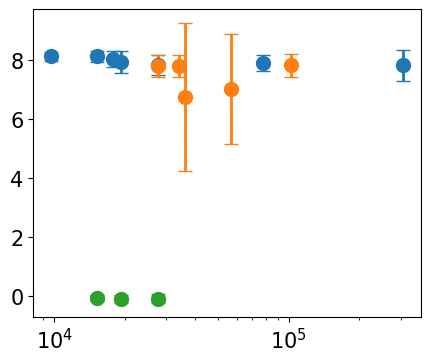

In [13]:
# plot the results
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5, 4))
plt.xscale("log")
# plot the results both mean and std
plt.errorbar(params_mlp, results_mlp_mean, yerr=results_mlp_std, label='MLP', fmt='o', capsize=5, elinewidth=2, markersize=10)
plt.errorbar(params, results_rbf_mean, yerr=results_rbf_std, label='URBF', fmt='o', capsize=5, elinewidth=2, markersize=10)
plt.errorbar(params_mrbf, results_mrbf_mean, yerr=results_mrbf_std, label='MRBF', fmt='o', capsize=5, elinewidth=2, markersize=10)
#plt.xlabel('Number of parameters')
#plt.ylabel('Average return')
plt.rcParams.update({'font.size': 15})
plt.savefig("error_bars_1_mrbf.pdf", format="pdf", bbox_inches="tight")

In [7]:
import plotly.graph_objects as go
import plotly.express as px

fig = go.Figure()
fig.add_trace(go.Scatter(x=params_mlp, y=results_mlp_mean, name='MLP', mode='lines+markers'))
fig.add_trace(go.Scatter(x=params_mlp, y=results_mlp_mean + results_mlp_std, name='MLP + std', mode='lines', line=dict(color='royalblue', width=0)))
fig.add_trace(go.Scatter(x=params_mlp, y=results_mlp_mean - results_mlp_std, name='MLP - std', mode='lines', line=dict(color='royalblue', width=0)))
fig.add_trace(go.Scatter(x=params_rbf, y=results_rbf_mean, name='RBF', mode='lines+markers'))
fig.add_trace(go.Scatter(x=params_rbf, y=results_rbf_mean + results_rbf_std, name='RBF + std', mode='lines', line=dict(color='firebrick', width=0)))
fig.add_trace(go.Scatter(x=params_rbf, y=results_rbf_mean - results_rbf_std, name='RBF - std', mode='lines', line=dict(color='firebrick', width=0)))
fig.update_layout(title='Mean and std of the return for the MLP and RBF like error bars', xaxis_title='Number of hidden units', yaxis_title='Return')
fig.show()

TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [8]:
# UTEST FOR EXPERIMENT 1
from scipy.stats import mannwhitneyu
scores = {}
algorithm = ['mlp', 'urbf']
data_arr = []
experiment_ids_mlp = [
        #"020102",
        #"020302",
        #"020402",
        #"020502",
        #"020001",
        #"020301",
        #"111211",
        #"020401",
        #"020103",
        #"020303",
        #"020403",
        #"020503",
        #"020391", #26,
        #"020381", #[64,64],
        "020351", #16
        "020361", #32   
        "020371", #64
        #"020461", #512, 32, 512
        #"020471",# 512, 512
]
experiment_ids_urbf = [
        #"111012",
        #"111112",
        #"111312",
        #"111412",
        #"111011",
        "111111", #16
        "111131", #32
        "111121", #64
        #"111231", #5 nnpi
        #"111331", #3 nnpi
        #"111311",
        #"111013",
        #"111113",
        #"111313",
        #"111413",
        #"111211",
]
experiment_ids_mrbf = [
    "311111",
    "311121",
    "311131",
]



results_mlp = []
params_mlp = []
for ids in experiment_ids_mlp:
    avg_return = []
    param = 0
    for j in range(10):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    param = int(count_params(file1))
    params_mlp.append(param)
    results_mlp.append(avg_return)

results_urbf = []
params = []
for ids in experiment_ids_urbf:
    avg_return = []
    param = 0
    for j in range(10):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    param = int(count_params(file1))
    results_urbf.append(avg_return)
    
results_mrbf = []
params = []
for ids in experiment_ids_mrbf:
    avg_return = []
    param = 0
    for j in range(10):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    param = int(count_params(file1))
    results_mrbf.append(avg_return)
    print("{}{}({})".format(ids, np.round(np.mean(avg_return),2), np.round(np.std(avg_return), 2)))

for i in range(3):
    print(i, mannwhitneyu(results_mlp[i], results_urbf[i])[1])

311111-0.07(0.1)
311121-0.08(0.15)
311131-0.1(0.13)
0 0.03268262477800756
1 0.13837184054958884
2 0.8484653557345806


In [8]:
from scipy.stats import mannwhitneyu
results = mannwhitneyu(avg_return_mlp, avg_return)
print(results)

MannwhitneyuResult(statistic=58.0, pvalue=0.5660404018123789)


In [116]:
import plotly.graph_objects as go
fig = go.Figure()
for ids in experiment_ids_mlp:
    fig.add_trace(go.Box(y=results_mlp[ids][0],
                         x=results_mlp[ids][1],
                         name=ids,
                         marker_color='blue',
                        boxmean=True # represent mean
))
for ids in experiment_ids_urbf:
    fig.add_trace(go.Box(y=results_urbf[ids][0],
                         x=results_urbf[ids][1],
                         name=ids,
                         marker_color='red',
                        boxmean=True # represent mean
))

fig.show()

TypeError: list indices must be integers or slices, not str

5


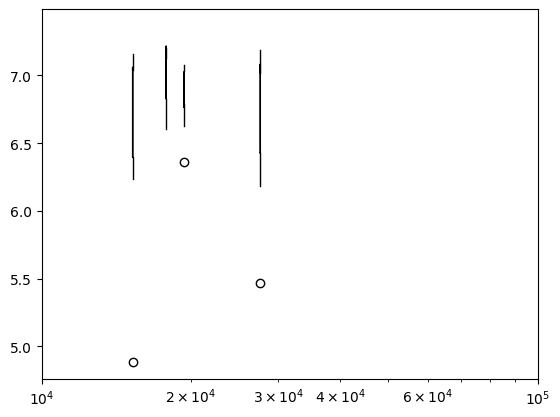

In [131]:
import matplotlib.pyplot as plt
print(len(results_mlp))
plt.boxplot(x=results_mlp, positions=params_mlp, notch = True)
plt.xlim([10000, 100000])
plt.xscale("log")

In [9]:
# Level 2
scores = {}
algorithm = ['mlp', 'urbf']
data_arr = []
experiment_ids_mlp = [
        #"020102",
        #"020302",
        #"020402",
        #"020502",
        #"020001",
        #"020301",
        #"111211",
        #"020401",
        #"020103",
        #"020303",
        #"020403",
        #"020503",
        "020392",
        "020382",
        "020372",
        "020362",
        "020352",
        "020462",
        "020472",
]
experiment_ids_urbf = [
        #"111012",
        #"111112",
        #"111312",
        #"111412",
        #"111011",
        "111112",
        "111132",
        "111122",
        "111232",
        "111332",
        #"111311",
        #"111013",
        #"111113",
        #"111313",
        #"111413",
        #"111211",
]
experiment_ids_mrbf = [
    "311112",
    "311132",
    "311122",
]

params_mlp2 = []
results_mlp_mean2 = []
results_mlp_std2 = []
results_rbf_mean2 = []
results_rbf_std2 = []
params_rbf2 = []

for ids in experiment_ids_mlp:
    avg_return = []
    param = 0
    for j in range(10):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    print(ids)
    param = count_params(file1)
    avg_return_mlp_2 = [ret for ret in avg_return]
    params_mlp2.append(param)
    results_mlp_std2.append(np.std(avg_return_mlp_2))
    results_mlp_mean2.append(np.mean(avg_return_mlp_2))
    print(f"{np.mean(avg_return_mlp_2):0.3f} ({np.std(avg_return_mlp_2):0.3f}) (params: {param}) ")
    
for ids in experiment_ids_urbf:
    avg_return = []
    param = 0
    for j in range(10):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    print(ids)
    avg_return_urbf_2 = [ret  for ret in avg_return]
    param = count_params(file1)
    params_rbf2.append(param)
    results_rbf_mean2.append(np.mean(avg_return_urbf_2))
    results_rbf_std2.append(np.std(avg_return_urbf_2))
    
    print(f"{np.mean(avg_return_urbf_2):0.3f} ({np.std(avg_return_urbf_2):0.3f}) (params: {param})")
#lenght_episodes = np.load('../experiments/experiment_020392/repetition_000001/data/rollout_ep_len_mean.npy', allow_pickle = True)
#print(lenght_episodes[-1:])

    
# MRBF
results_mrbf2 = []
results_mrbf_mean2 = []
results_mrbf_std2 = []
params_mrbf2 = []

    
for ids in experiment_ids_mrbf:
    avg_return = []
    param = 0
    for j in range(10):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    print(ids)
    param = int(count_params(file1))
    results_mrbf2.append(avg_return)
    params_mrbf2.append(param)
    avg_return_mrbf_2 = [ret  for ret in avg_return]
    results_mrbf_mean2.append(np.mean(avg_return))
    results_mrbf_std2.append(np.std(avg_return))
    print(f"{np.mean(avg_return_mrbf_2):0.3f} ({np.std(avg_return_mrbf_2):0.3f}) (params: {param})")



020392
7.140 (2.396) (params: [17822]) 
020382
7.110 (2.409) (params: [9668]) 
020372
7.080 (2.502) (params: [27588]) 
020362
7.310 (1.973) (params: [19364]) 
020352
6.260 (3.221) (params: [15252]) 
020462
7.820 (0.275) (params: [77348]) 
020472
7.800 (0.379) (params: [306692]) 
111112
8.000 (0.167) (params: [34004])
111132
7.640 (0.377) (params: [56868])
111122
7.760 (0.265) (params: [102596])
111232
7.760 (0.427) (params: [36068])
111332
6.930 (2.393) (params: [27748])
311112
-0.290 (0.453) (params: 15252)
311132
-0.200 (0.276) (params: 19364)
311122
-0.270 (0.429) (params: 27588)


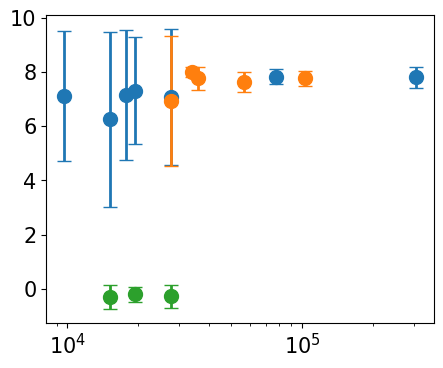

In [10]:

# plot the results
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5, 4))
# plot the results both mean and std
# draw the x axis in log scale
plt.xscale("log")
plt.errorbar(params_mlp2, results_mlp_mean2, yerr=results_mlp_std2, label='MLP', fmt='o', capsize=5, elinewidth=2, markersize=10)
plt.errorbar(params_rbf2, results_rbf_mean2, yerr=results_rbf_std2, label='URBF', fmt='o', capsize=5, elinewidth=2, markersize=10)
plt.errorbar(params_mrbf2, results_mrbf_mean2, yerr=results_mrbf_std2, label='MRBF', fmt='o', capsize=5, elinewidth=2, markersize=10)

#plt.xlabel('Number of parameters')
#plt.ylabel('Average return')
plt.rcParams.update({'font.size': 15})
plt.savefig("error_bars_2_mrbf.pdf", format="pdf", bbox_inches="tight")

In [18]:
# UTEST FOR EXPERIMENT 2
from scipy.stats import mannwhitneyu
scores = {}
algorithm = ['mlp', 'urbf']
data_arr = []
experiment_ids_mlp = [
        #"020102",
        #"020302",
        #"020402",
        #"020502",
        #"020001",
        #"020301",
        #"111211",
        #"020401",
        #"020103",
        #"020303",
        #"020403",
        #"020503",
        #"020391", #26,
        #"020381", #[64,64],
        "020352", #16
        "020362", #32   
        "020372", #64
        #"020461", #512, 32, 512
        #"020471",# 512, 512
]
experiment_ids_urbf = [
        #"111012",
        #"111112",
        #"111312",
        #"111412",
        #"111011",
        "111112", #16
        "111132", #32
        "111122", #64
        #"111231", #5 nnpi
        #"111331", #3 nnpi
        #"111311",
        #"111013",
        #"111113",
        #"111313",
        #"111413",
        #"111211",
]

results_mlp = []
params_mlp = []
for ids in experiment_ids_mlp:
    avg_return = []
    param = 0
    for j in range(10):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    param = int(count_params(file1))
    params_mlp.append(param)
    results_mlp.append(avg_return)

results_urbf = []
params = []
for ids in experiment_ids_urbf:
    avg_return = []
    param = 0
    for j in range(10):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    param = int(count_params(file1))
    results_urbf.append(avg_return)
for i in range(3):
    print(i, mannwhitneyu(results_mlp[i], results_urbf[i])[1])

0 0.30290080698100874
1 0.13112786657538175
2 0.4665808686369457


In [10]:
from scipy.stats import mannwhitneyu
results = mannwhitneyu(avg_return_mlp_2, avg_return_urbf_2)
print(results)

MannwhitneyuResult(statistic=56.5, pvalue=0.6486650984555938)


In [5]:
# Level 3
scores = {}
algorithm = ['mlp', 'urbf']
data_arr = []
experiment_ids_mlp = [
        #"020102",
        #"020302",
        #"020402",
        #"020502",
        #"020001",
        #"020301",
        #"111211",
        #"020401",
        #"020103",
        #"020303",
        #"020403",
        #"020503",
        "020393",
        "020383",
        "020373",
        "020363",
        "020353",
        "020463",
        "020473",
]
experiment_ids_urbf = [
        #"111012",
        #"111112",
        #"111312",
        #"111412",
        #"111011",
        "111113",
        "111133",
        "111123",
        "111233",
        "111333",
        #"111311",
        #"111013",
        #"111113",
        #"111313",
        #"111413",
        #"111211",
]

experiment_ids_mrbf = [
    "313113",
    "313123",
    "313133",
]

results_mlp_mean3 = []
results_mlp_std3 = []
params_mlp3 = []
results_rbf_mean3 = []
results_rbf_std3 = []
params_rbf3 = []

for ids in experiment_ids_mlp:
    avg_return = []
    param = 0
    for j in range(10):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    print(ids)
    avg_return_mlp_3 = [ret  for ret in avg_return]
    param = count_params(file1)
    params_mlp3.append(param)
    results_mlp_mean3.append(np.mean(avg_return_mlp_3))
    results_mlp_std3.append(np.std(avg_return_mlp_3))
    print(f"{np.mean(avg_return_mlp_3):0.3f} ({np.std(avg_return_mlp_3):0.3f}) (params: {param}) ")
    
for ids in experiment_ids_urbf:
    avg_return = []
    param = 0
    for j in range(10):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    print(ids)
    avg_return_urbf_3 = [ret for ret in avg_return]
    param = count_params(file1)
    params_rbf3.append(param)
    results_rbf_mean3.append(np.mean(avg_return_urbf_3))
    results_rbf_std3.append(np.std(avg_return_urbf_3))
    print(f"{np.mean(avg_return_urbf_3):0.3f} ({np.std(avg_return_urbf_3):0.3f}) (params: {param})")
lenght_episodes = np.load('../experiments/experiment_111113/repetition_000001/data/rollout_ep_len_mean.npy', allow_pickle = True)
print(lenght_episodes[-1:])

    
    
# MRBF
results_mrbf3 = []
results_mrbf_mean3 = []
results_mrbf_std3 = []
params_mrbf3 = []

    
for ids in experiment_ids_mrbf:
    avg_return = []
    param = 0
    for j in range(10):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    print(ids)
    param = int(count_params(file1))
    results_mrbf3.append(avg_return)
    params_mrbf3.append(param)
    avg_return_mrbf_3 = [ret  for ret in avg_return]
    results_mrbf_mean3.append(np.mean(avg_return))
    results_mrbf_std3.append(np.std(avg_return))
    print(f"{np.mean(avg_return_mrbf_3):0.2f} ({np.std(avg_return_mrbf_3):0.2f}) (params: {param})")



020393
5.460 (3.716) (params: [17822]) 
020383
3.150 (3.985) (params: [9668]) 
020373
6.280 (3.194) (params: [27588]) 
020363
6.020 (3.159) (params: [19364]) 
020353
4.620 (4.002) (params: [15252]) 
020463
6.790 (2.445) (params: [77348]) 
020473
7.600 (0.402) (params: [306692]) 
111113
6.820 (2.343) (params: [34004])
111133
7.690 (0.406) (params: [56868])
111123
6.920 (2.169) (params: [102596])
111233
5.290 (3.439) (params: [36068])
111333
6.360 (2.475) (params: [27748])
[12.28]
313113
-0.18 (0.25) (params: 15252)
313123
-0.12 (0.10) (params: 27588)
313133
-0.08 (0.11) (params: 19364)


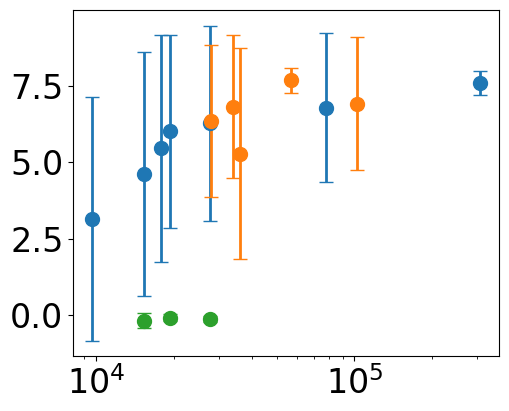

In [13]:
# plot the results
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5.5, 4.5))
# plot the results both mean and std
# draw the x axis in log scale
plt.xscale("log")
plt.errorbar(params_mlp3, results_mlp_mean3, yerr=results_mlp_std3, label='MLP', fmt='o', capsize=5, elinewidth=2, markersize=10)
plt.errorbar(params_rbf3, results_rbf_mean3, yerr=results_rbf_std3, label='URBF', fmt='o', capsize=5, elinewidth=2, markersize=10)
plt.errorbar(params_mrbf3, results_mrbf_mean3, yerr=results_mrbf_std3, label='MRBF', fmt='o', capsize=5, elinewidth=2, markersize=10)
#plt.xlabel('Number of parameters')
#plt.ylabel('Average return')
plt.rcParams.update({'font.size': 24})
#plt.legend(loc='lower right')
plt.savefig("error_bars_3_mrbf.pdf", format="pdf", bbox_inches="tight")

In [19]:
# UTEST FOR EXPERIMENT 2
from scipy.stats import mannwhitneyu
scores = {}
algorithm = ['mlp', 'urbf']
data_arr = []
experiment_ids_mlp = [
        #"020102",
        #"020302",
        #"020402",
        #"020502",
        #"020001",
        #"020301",
        #"111211",
        #"020401",
        #"020103",
        #"020303",
        #"020403",
        #"020503",
        #"020391", #26,
        #"020381", #[64,64],
        "020353", #16
        "020363", #32   
        "020373", #64
        #"020461", #512, 32, 512
        #"020471",# 512, 512
]
experiment_ids_urbf = [
        #"111012",
        #"111112",
        #"111312",
        #"111412",
        #"111011",
        "111113", #16
        "111133", #32
        "111123", #64
        #"111231", #5 nnpi
        #"111331", #3 nnpi
        #"111311",
        #"111013",
        #"111113",
        #"111313",
        #"111413",
        #"111211",
]

results_mlp = []
params_mlp = []
for ids in experiment_ids_mlp:
    avg_return = []
    param = 0
    for j in range(10):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    param = int(count_params(file1))
    params_mlp.append(param)
    results_mlp.append(avg_return)

results_urbf = []
params = []
for ids in experiment_ids_urbf:
    avg_return = []
    param = 0
    for j in range(10):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    param = int(count_params(file1))
    results_urbf.append(avg_return)
for i in range(3):
    print(i, mannwhitneyu(results_mlp[i], results_urbf[i])[1])

0 0.7037534163945434
1 0.7045023535087
2 0.4688056976047692


In [12]:
from scipy.stats import mannwhitneyu
results = mannwhitneyu(avg_return_mlp_3, avg_return_urbf_3)
print(results)

MannwhitneyuResult(statistic=64.5, pvalue=0.28644995968289144)


In [76]:
scores = {}
algorithm = ['mlp', 'urbf']
data_arr = []
experiment_ids_mlp = [
        #"020102",
        #"020302",
        #"020402",
        #"020502",
        #"020001",
        #"020301",
        #"111211",
        #"020401",
        #"020103",
        #"020303",
        #"020403",
        #"020503",
        "020393",
        "020383",
        "020373",
        "020363",
        "020353",
        "020463",
        "020473",
]
experiment_ids_urbf = [
        #"111012",
        #"111112",
        #"111312",
        #"111412",
        #"111011",
        "111113",
        "111133",
        "111123",
        "111233",
        "111333",
        #"111311",
        #"111013",
        #"111113",
        #"111313",
        #"111413",
        #"111211",
]

results_mlp_mean3 = []
results_mlp_std3 = []
params_mlp3 = []
results_rbf_mean3 = []
results_rbf_std3 = []
params_rbf3 = []

for ids in experiment_ids_mlp:
    avg_return = []
    param = 0
    for j in range(10):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    print(ids)
    avg_return_mlp_3 = [ret  for ret in avg_return]
    param = count_params(file1)
    params_mlp3.append(param)
    results_mlp_mean3.append(np.mean(avg_return_mlp_3))
    results_mlp_std3.append(np.std(avg_return_mlp_3))
    print(f"{np.mean(avg_return_mlp_3):0.3f} ({np.std(avg_return_mlp_3):0.3f}) (params: {param}) ")
    
for ids in experiment_ids_urbf:
    avg_return = []
    param = 0
    for j in range(10):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    print(ids)
    avg_return_urbf_3 = [ret for ret in avg_return]
    param = count_params(file1)
    params_rbf3.append(param)
    results_rbf_mean3.append(np.mean(avg_return_urbf_3))
    results_rbf_std3.append(np.std(avg_return_urbf_3))
    print(f"{np.mean(avg_return_urbf_3):0.3f} ({np.std(avg_return_urbf_3):0.3f}) (params: {param})")
lenght_episodes = np.load('../experiments/experiment_111113/repetition_000001/data/rollout_ep_len_mean.npy', allow_pickle = True)
print(lenght_episodes[-1:])


020393
5.460 (3.716) (params: [17822]) 
020383
3.150 (3.985) (params: [9668]) 
020373
6.280 (3.194) (params: [27588]) 
020363
6.020 (3.159) (params: [19364]) 
020353
4.620 (4.002) (params: [15252]) 
020463
6.790 (2.445) (params: [77348]) 
020473
7.600 (0.402) (params: [306692]) 
111113
6.820 (2.343) (params: [34004])
111133
7.690 (0.406) (params: [56868])
111123
6.920 (2.169) (params: [102596])
111233
5.290 (3.439) (params: [36068])
111333
6.360 (2.475) (params: [27748])
[12.28]


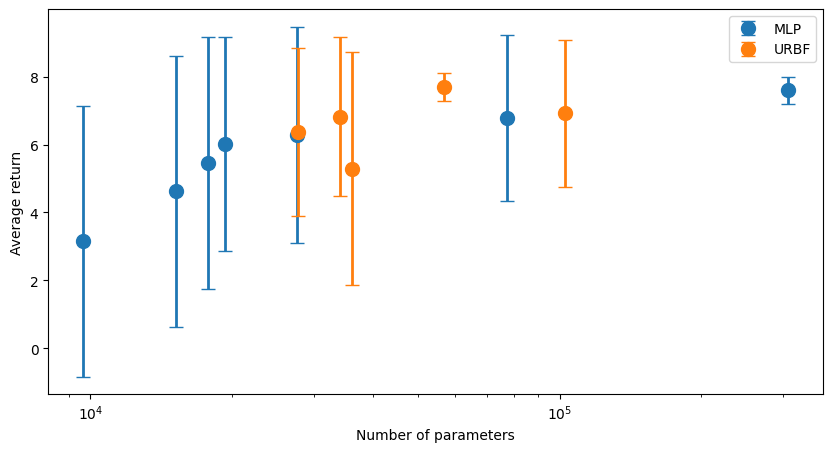

In [79]:
# plot the results
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 5))
# plot the results both mean and std
# draw the x axis in log scale
plt.xscale("log")
plt.errorbar(params_mlp3, results_mlp_mean3, yerr=results_mlp_std3, label='MLP', fmt='o', capsize=5, elinewidth=2, markersize=10)
plt.errorbar(params_rbf3, results_rbf_mean3, yerr=results_rbf_std3, label='URBF', fmt='o', capsize=5, elinewidth=2, markersize=10)
plt.xlabel('Number of parameters')
plt.ylabel('Average return')
plt.legend()
plt.show()

In [13]:
scores = {}
algorithm = ['mlp', 'urbf']
data_arr = []
experiment_ids_mlp = [
        #"020102",
        #"020302",
        #"020402",
        #"020502",
        #"020001",
        #"020301",
        #"111211",
        #"020401",
        #"020103",
        #"020303",
        #"020403",
        #"020503",
        "023393",
        "023383",
        "023373",
        "023363",
        "023353",
        "023463",
        "023473",
]
experiment_ids_urbf = [
        #"111012",
        #"111112",
        #"111312",
        #"111412",
        #"111011",
        "113113",
        "113133",
        "113123",
        "113233",
        "113333",
        #"111311",
        #"111013",
        #"111113",
        #"111313",
        #"111413",
        #"111211",
]

for ids in experiment_ids_mlp:
    avg_return = []
    param = 0
    for j in range(10):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    print(ids)
    #avg_return = [ret / 9 for ret in avg_return]
    param = count_params(file1)
    print(f"{np.mean(avg_return):0.3f} ({np.std(avg_return):0.3f}) (params: {param}) ")
    
for ids in experiment_ids_urbf:
    avg_return = []
    param = 0
    for j in range(10):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    print(ids)
    #avg_return = [ret / 9 for ret in avg_return]
    param = count_params(file1)
    print(f"{np.mean(avg_return):0.3f} ({np.std(avg_return):0.3f}) (params: {param})")
lenght_episodes = np.load('../experiments/experiment_111113/repetition_000001/data/rollout_ep_len_mean.npy', allow_pickle = True)
print(lenght_episodes[-1:])


023393
5.860 (1.990) (params: [17822]) 
023383
4.530 (3.149) (params: [9668]) 
023373
5.210 (2.672) (params: [27588]) 
023363
6.590 (0.441) (params: [19364]) 
023353
4.490 (3.126) (params: [15252]) 
023463
6.380 (0.394) (params: [77348]) 
023473
5.850 (1.651) (params: [306692]) 
113113
6.470 (0.443) (params: [34004])
113133
5.320 (2.234) (params: [56868])
113123
6.390 (0.478) (params: [102596])
113233
5.730 (1.990) (params: [36068])
113333
6.440 (0.502) (params: [27748])
[12.28]


In [44]:
scores = {}
algorithm = ['mlp', 'urbf']
data_arr = []
experiment_ids_mlp = [
        #"020102",
        #"020302",
        #"020402",
        #"020502",
        #"020001",
        "020301",
        #"111211",
        #"020401",
        #"020103",
        #"020303",
        #"020403",
        #"020503",

]
experiment_ids_urbf = [
        #"111012",
        #"111112",
        #"111312",
        #"111412",
        #"111011",
        #"111111",
        #"111311",
        #"111013",
        #"111113",
        #"111313",
        #"111413",
        "111211",
]

for ids in experiment_ids_mlp:
    for j in range(10):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            print(file)
            data = np.load(file, allow_pickle=True)
            area = np.trapz(data, dx = 1)
            print(area)
        except:
            #data_arr.append(data[-1])
            print("repetition not found")


../experiments/experiment_020301/repetition_000000/data/reward_per_timestep.npy
repetition not found
../experiments/experiment_020301/repetition_000001/data/reward_per_timestep.npy
repetition not found
../experiments/experiment_020301/repetition_000002/data/reward_per_timestep.npy
repetition not found
../experiments/experiment_020301/repetition_000003/data/reward_per_timestep.npy
repetition not found
../experiments/experiment_020301/repetition_000004/data/reward_per_timestep.npy
repetition not found
../experiments/experiment_020301/repetition_000005/data/reward_per_timestep.npy
repetition not found
../experiments/experiment_020301/repetition_000006/data/reward_per_timestep.npy
repetition not found
../experiments/experiment_020301/repetition_000007/data/reward_per_timestep.npy
repetition not found
../experiments/experiment_020301/repetition_000008/data/reward_per_timestep.npy
repetition not found
../experiments/experiment_020301/repetition_000009/data/reward_per_timestep.npy
repetition 

In [12]:
aggregate_func = lambda x: np.array([
  metrics.aggregate_median(x),
  metrics.aggregate_iqm(x),
  metrics.aggregate_mean(x),
  metrics.aggregate_optimality_gap(x)])
aggregate_scores, aggregate_score_cis = rly.get_interval_estimates(
  scores, aggregate_func, reps=50000)
fig, axes = plot_utils.plot_interval_estimates(
  aggregate_scores, aggregate_score_cis,
  metric_names=['Median', 'IQM', 'Mean', 'Optimality Gap'],
  algorithms=algorithm, xlabel='Human Normalized Score')


NameError: name 'rly' is not defined

<AxesSubplot: xlabel='P(X > Y)', ylabel='Algorithm X'>

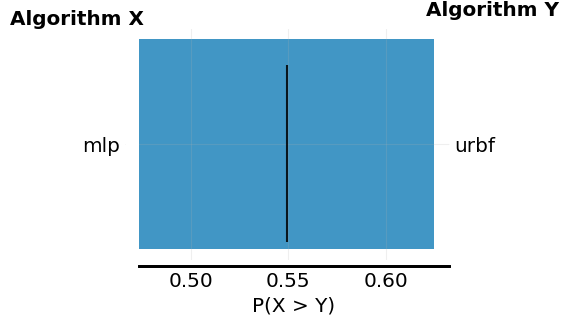

In [67]:
procgen_algorithm_pairs = {'mlp,urbf': (scores['mlp'], scores['urbf'])}
average_probabilities, average_prob_cis = rly.get_interval_estimates(
  procgen_algorithm_pairs, metrics.probability_of_improvement, reps=2000)
plot_utils.plot_probability_of_improvement(average_probabilities, average_prob_cis)


In [85]:
    # URBF Level 3
    average_reward_list = []
    experiment_ids = [
        "111013",
        "111113",
        "111313",
        "111413",
    ]
    for ids in experiment_ids:
        average_reward_list = []
        for j in range(9):
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000' + str(j) + '/data/rollout_ep_rew_mean.npy'
            try:
                average_reward_list.append(average_reward_over_time(file))
            except:
                continue
        print(ids)
        print("%.4f (%.3f)" % (np.mean(average_reward_list), np.std(average_reward_list)))

011013
0.6637 (0.112)
111013
0.6830 (0.118)
111113
0.5864 (0.141)
111313
0.6241 (0.143)
111413
0.6729 (0.148)


In [89]:
    # MLP Level 1
    average_reward_list = []
    experiment_ids = [
        "020001",
        "020301",
        "020401",
        "020501",
    ]
    for ids in experiment_ids:
        average_reward_list = []
        for j in range(9):
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000' + str(j) + '/data/rollout_ep_rew_mean.npy'
            average_reward_list.append(average_reward_over_time(file))
        print(ids)
        print("%.4f (%.3f)" % (np.mean(average_reward_list), np.std(average_reward_list)))

020001
0.9365 (0.005)
020301
0.9271 (0.009)
020401
0.9234 (0.017)
020501
0.9289 (0.008)


In [90]:
    # URBF level 1
    average_reward_list = []
    experiment_ids = [
        "111011",
        "111111",
        "111311",
    ]
    for ids in experiment_ids:
        average_reward_list = []
        for j in range(9):
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000' + str(j) + '/data/rollout_ep_rew_mean.npy'
            average_reward_list.append(average_reward_over_time(file))
        print(ids)
        print("%.4f (%.3f)" % (np.mean(average_reward_list), np.std(average_reward_list)))

111011
0.9341 (0.008)
111111
0.9290 (0.011)
111311
0.9315 (0.011)


In [91]:
    # MLP level 2
    average_reward_list = []
    experiment_ids = [
        "020102",
        "020302",
        "020402",
        "020502"
    ]
    for ids in experiment_ids:
        average_reward_list = []
        for j in range(9):
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000' + str(j) + '/data/rollout_ep_rew_mean.npy'
            average_reward_list.append(average_reward_over_time(file))
        print(ids)
        print("%.4f (%.3f)" % (np.mean(average_reward_list), np.std(average_reward_list)))

020102
0.9187 (0.017)
020302
0.9162 (0.014)
020402
0.9050 (0.019)
020502
0.8633 (0.132)


In [92]:
    # URBF level 2
    average_reward_list = []
    experiment_ids = [
        "111012",
        "111112",
        "111312",
        "111412"
    ]
    for ids in experiment_ids:
        average_reward_list = []
        for j in range(9):
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000' + str(j) + '/data/rollout_ep_rew_mean.npy'
            average_reward_list.append(average_reward_over_time(file))
        print(ids)
        print("%.4f (%.3f)" % (np.mean(average_reward_list), np.std(average_reward_list)))

111012
0.9016 (0.029)
111112
0.8895 (0.068)
111312
0.9128 (0.027)
111412
0.9036 (0.032)


In [83]:
    # MLP Level 3
    average_reward_list = []
    experiment_ids = [
        "020103",
        "020303",
        "020403",
        "020503",
    ]
    for ids in experiment_ids:
        average_reward_list = []
        for j in range(9):
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000' + str(j) + '/data/rollout_ep_rew_mean.npy'
            try:
                average_reward_list.append(average_reward_over_time(file))
            except:
                continue
        print(ids)
        print("%.4f (%.3f)" % (np.mean(average_reward_list), np.std(average_reward_list)))

020103
0.8288 (0.159)
020303
0.7253 (0.129)
020403
0.6452 (0.111)
020503
0.6023 (0.113)


# Total Return

In [ ]:
# parameters
experiment_ids = [
    #'00000',
    '10300',
    #'25300',
    '60300',
    '70300',
    '80311',
]

labels = [
    #'Random',
    'QL', 
    #'SFQL (O)', 
    #'MF Xi', 
    #'MB Xi',
    'SFQL', 
    'MF Xi', 
    'MB Xi'
]

# ranges = [
#     '[0.0 0.25]',
#     '[0.25 0.5]',
#     '[0.5 0.75]',
#     '[0.75 1.0]',
#     '[1.0 1.25]',
#     '[1.25 1.5]',
#     '[1.5 1.75]',
# ]

ranges = [
    '0.125',
    '0.375',
    '0.625',
    '0.875',
    '1.125',
    '1.375',
    '1.625',
]

In [ ]:
# collect data 
collected_experiment_data = []

for experiment_id_template in experiment_ids:
    
    cur_data = eu.AttrDict()
    cur_data.means = []
    cur_data.stds = []
    #cur_data.sems = []
    
    for range_idx in range(len(ranges)):
        
        experiment_id = '{}{}'.format(experiment_id_template, range_idx)
    
        total_rewards = []
        for rep_data in experiment_data_loader.experiment_data[experiment_id].repetition_data.values():
            total_rewards.append(rep_data.total_reward[0])
    
        cur_data.means.append(np.mean(total_rewards))
        cur_data.stds.append(np.std(total_rewards))
        #cur_data.means.append(np.mean(total_rewards))
        
    collected_experiment_data.append(cur_data)

In [ ]:
# plotting
import plotly.graph_objects as go
import plotly

# default print properties
multiplier = 2

pixel_cm_ration = 36.5

width_full = int(13.95 * pixel_cm_ration) * multiplier
width_half = int(13.95/2 * pixel_cm_ration) * multiplier
width_third = int(13.95/3 * pixel_cm_ration) * multiplier

height_default_1 = int(3.5 * pixel_cm_ration) * multiplier

# margins in pixel
top_margin = 0 * multiplier 
left_margin = 35 * multiplier 
right_margin = 0 * multiplier 
bottom_margin = 25 * multiplier 

font_size = 8 * multiplier 
font_family='Times New Roman'

line_width = 1 * multiplier 

layout = eu.AttrDict(
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
        
        xaxis = eu.AttrDict(
            title = 'Mean Error of Linear Reward Model',
            showline = True,
            linewidth = 1,
            zeroline=False,
            linecolor='black',
            showgrid=True,
            gridwidth=1,
            gridcolor='LightGrey',
            mirror=True,
            tickvals = np.arange(len(ranges)),
            ticktext = ranges, 
            tickangle = 30, 
        ),
        yaxis = eu.AttrDict(
            title = 'Total Return',
            showline = True,
            linewidth = 1,
            zeroline=False,
            linecolor='black',
            showgrid=True,
            gridwidth=1,
            gridcolor='LightGrey',
            mirror=True,
        ),
        font = eu.AttrDict(
            family=font_family, 
            size=font_size,
            color='black',
            ),
        width=width_third, # in cm
        height=height_default_1, # in cm
        
        margin = eu.AttrDict(
            l=left_margin, #left margin in pixel
            r=right_margin, #right margin in pixel
            b=bottom_margin, #bottom margin in pixel
            t=top_margin,  #top margin in pixel
            ),

        showlegend=True,
        legend=eu.AttrDict(
                orientation="h",
                yanchor="bottom",
                y=1.02,
                xanchor="right",
                x=1,
            
            ), 
        )

default_colors = [
    'rgb(0,158,115)', # green
    'rgb(0,0,0)', # black
    #'rgb(0,0,0)', # black
    'rgb(0,114,178)',  # dark blue
    'rgb(213,94,0)',  # orange
] 

fig = go.Figure(layout=layout)
for exp_idx, exp_label in enumerate(labels):

    fig.add_trace(go.Scatter(
            x=np.arange(len(ranges)),
            y=collected_experiment_data[exp_idx].means,
            error_y=dict(
                type='data', # value of error bar given in data coordinates
                array=collected_experiment_data[exp_idx].stds,
                visible=True),
            name= exp_label,
            marker_color=default_colors[exp_idx]
        )
    )

    
#plotly.io.write_image(fig, '../../analyze/iclr_figures/result_linear_model_task_difficulty_total_return.pdf')    
# plotly.io.write_image(fig, './result_linear_model_task_difficulty_total_return.pdf')    
fig.show()

# Ratios

In [ ]:
# parameters
experiment_ids = [
#     ('00000', '70300'),
    ('10300', '70300'),
    ('60300', '70300'),
]

labels = [
#     'Random / MF Xi (R)',
    'QL / Xi',
    'SFQL / Xi',
]

# ranges = [
#     '[0.0 0.25]',
#     '[0.25 0.5]',
#     '[0.5 0.75]',
#     '[0.75 1.0]',
#     '[1.0 1.25]',
#     '[1.25 1.5]',
#     '[1.5 1.75]',
# ]

ranges = [
    '0.125',
    '0.375',
    '0.625',
    '0.875',
    '1.125',
    '1.375',
    '1.625',
]

In [ ]:
# collect data 
collected_experiment_data = []

for experiment_id_templates in experiment_ids:
    
    cur_data = eu.AttrDict()
    cur_data.means = []
    cur_data.stds = []
    
    for range_idx in range(len(ranges)):
        
        experiment_id_1 = '{}{}'.format(experiment_id_templates[0], range_idx)
        experiment_id_2 = '{}{}'.format(experiment_id_templates[1], range_idx)
        
        ratios = []
        for rep_idx in experiment_data_loader.experiment_data[experiment_id_1].repetition_data.keys():
            
            rep_data_1 = experiment_data_loader.experiment_data[experiment_id_1].repetition_data[rep_idx]
            rep_data_2 = experiment_data_loader.experiment_data[experiment_id_2].repetition_data[rep_idx]
            
            ratios.append(rep_data_1.total_reward[0] / rep_data_2.total_reward[0])
    
        cur_data.means.append(np.mean(ratios))
        cur_data.stds.append(np.std(ratios))
         
    collected_experiment_data.append(cur_data)

In [ ]:
# plotting
import plotly.graph_objects as go
import plotly

# default print properties
multiplier = 2

pixel_cm_ration = 36.5

width_full = int(13.95 * pixel_cm_ration) * multiplier
width_half = int(13.95/2 * pixel_cm_ration) * multiplier
width_third = int(16/3 * pixel_cm_ration) * multiplier

height_default_1 = int(3.4 * pixel_cm_ration) * multiplier

# margins in pixel
top_margin = 0 * multiplier 
left_margin = 10 * multiplier 
right_margin = 0 * multiplier 
bottom_margin = 25 * multiplier 

font_size = 8 * multiplier 
font_family='Times New Roman'

line_width = 1 * multiplier 

layout = eu.AttrDict(
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
        
        xaxis = eu.AttrDict(
            title = 'Mean Error of Linear Model',
            showline = True,
            linewidth = 1,
            zeroline=False,
            linecolor='black',
            showgrid=True,
            gridwidth=1,
            gridcolor='LightGrey',
            mirror=True,
            tickvals = np.arange(len(ranges)),
            ticktext = ranges,  
            tickangle = 30, 
        ),
        yaxis = eu.AttrDict(
            title = 'Total Return Ratio',
            showline = True,
            linewidth = 1,
            zeroline=False,
            linecolor='black',
            showgrid=True,
            gridwidth=1,
            gridcolor='LightGrey',
            mirror=True,
        ),
        font = eu.AttrDict(
            family=font_family, 
            size=font_size,
            color='black',
            ),
        width=width_third, # in cm
        height=height_default_1, # in cm
        
        margin = eu.AttrDict(
            l=left_margin, #left margin in pixel
            r=right_margin, #right margin in pixel
            b=bottom_margin, #bottom margin in pixel
            t=top_margin,  #top margin in pixel
            ),

        showlegend=True,
        legend=eu.AttrDict(
                orientation="h",
                yanchor="bottom",
                y=1.02,
                xanchor="right",
                x=1,
            
            ), 
        )

default_colors = [
    'rgb(0,0,0)', # black
    'rgb(0,114,178)',  # dark blue
] 


fig = go.Figure(layout=layout)
for exp_idx, exp_label in enumerate(labels):

    fig.add_trace(go.Scatter(
            x=np.arange(len(ranges)),
            y=collected_experiment_data[exp_idx].means,
            error_y=dict(
                type='data', # value of error bar given in data coordinates
                array=collected_experiment_data[exp_idx].stds,
                visible=True),
            name= exp_label,
            marker_color=default_colors[exp_idx]
        )
    )

    
#plotly.io.write_image(fig, '../../analyze/iclr_figures/result_linear_model_task_difficulty_ratio.pdf') 
# plotly.io.write_image(fig, './result_linear_model_task_difficulty_ratio.pdf') 
plotly.io.write_image(fig, '/scratchlocal/creinke/data/study/perception/experiments/continuous_sf_01/analyze/icml_figures/result_linear_model_task_difficulty_ratio.pdf') 
fig.show()